Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.

 

Example 1:

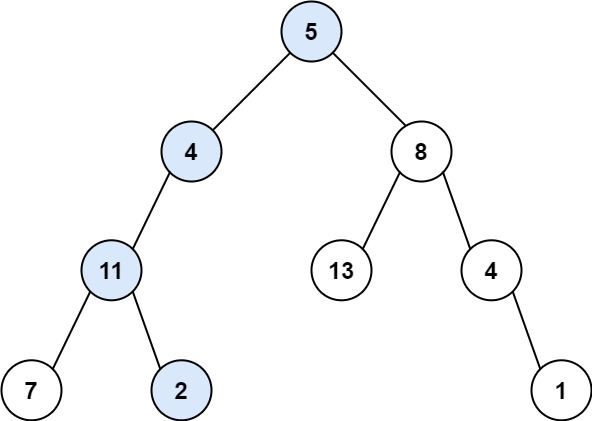

* Input: root = [5,4,8,11,null,13,4,7,2,null,null,null,1], targetSum = 22
* Output: true
* Explanation: The root-to-leaf path with the target sum is shown.


Example 2:
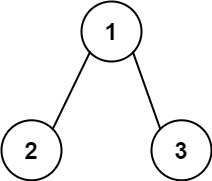


* Input: root = [1,2,3], targetSum = 5
* Output: false
* Explanation: There two root-to-leaf paths in the tree:

        (1 --> 2): The sum is 3.
        (1 --> 3): The sum is 4.

There is no root-to-leaf path with sum = 5.


Example 3:

* Input: root = [], targetSum = 0
* Output: false
* Explanation: Since the tree is empty, there are no root-to-leaf paths.
 

Constraints:

The number of nodes in the tree is in the range [0, 5000].

-1000 <= Node.val <= 1000

-1000 <= targetSum <= 1000

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution(object):
    def hasPathSum(self, root, targetSum):
        """
        :type root: TreeNode
        :type targetSum: int
        :rtype: bool
        """

        """
        approach :
            two queues to handle the element & sum upto that element
            use breath first search
            check on leaf nodes ( left/right none) sum equals to the target
        """
        if root is None : return False

        node_q , sum_q  = [root] , [0]

        while len( node_q ) > 0 :
            # get the current node
            cur_node , cur_sum = node_q.pop(0) , sum_q.pop(0)
            # check if the node is a leaf or not if so do the comparison
            if( ( cur_node.left is None ) and (cur_node.right is None) ):
                total_sum = cur_sum + cur_node.val
                if( total_sum == targetSum ): return True

            else:
                cur_sum = cur_sum + cur_node.val
                if( cur_node.left is not None ):
                    node_q.append( cur_node.left )
                    sum_q.append( cur_sum )
                if ( cur_node.right is not None ):
                    node_q.append( cur_node.right )
                    sum_q.append(cur_sum)

        return False

> recursive approach

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution(object):
    def hasPathSum(self, root, targetSum):
        """
        :type root: TreeNode
        :type targetSum: int
        :rtype: bool
        """

        """
        approach :
            two queues to handle the element & sum upto that element
            use breath first search
            check on leaf nodes ( left/right none) sum equals to the target
        """

        ################## recursive approach ####################

        if root is None : return False

        cur_sum = 0

        def node_traversal(root, cur_sum , target_sum):

            if root is None : return False

            #  check on leaf node state
            if( (root.left is None ) and (root.right is None) ):
                return   (cur_sum + root.val) == target_sum

            else:
                left_status = node_traversal(root.left , cur_sum+root.val , target_sum)
                right_status = node_traversal(root.right , cur_sum+root.val , target_sum)

                return left_status | right_status

        return node_traversal(root, cur_sum , targetSum)